# Ìndixi de Gini in Sardìnnia in su 2019

Pigaus is informus de s'
[ISTAT](http://dati.istat.it/Index.aspx?DataSetCode=MEF_REDDITIIRPEF_COM) po su _dataset_
de su 2019 _"Contribuenti e reddito complessivo per classi di importo"_. Custus informus
funt donaus cun licèntzia [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/).

In [1]:
import pandas as pd 

raw_data = pd.read_csv('MEF_REDDITIIRPEF_COM_31012022114626669.csv')
raw_data.head()

,ITTER107,Territorio,TIPO_DATO_MEF,Tipo dato,IMPORTOEURO,Classe di importo,TIME,Seleziona anno di imposta,Value,Flag Codes,Flags
0,1272,Torino,AGGINCF,contribuenti per classe di importo,E_UN0,minore o uguale a 0 euro,2019,2019,71.0,NaN,NaN
1,1272,Torino,AGGINCR,reddito per classi di importo,E_UN0,minore o uguale a 0 euro,2019,2019,-441269.0,NaN,NaN
2,2158,Vercelli,AGGINCF,contribuenti per classe di importo,E_UN0,minore o uguale a 0 euro,2019,2019,NaN,c,dato oscurato per la tutela del segreto statis...
3,2158,Vercelli,AGGINCR,reddito per classi di importo,E_UN0,minore o uguale a 0 euro,2019,2019,NaN,c,dato oscurato per la tutela del segreto statis...
4,3106,Novara,AGGINCF,contribuenti per classe di importo,E_UN0,minore o uguale a 0 euro,2019,2019,5.0,NaN,NaN


Limpiaus is informus, ndi bogaus is colonnas chi no eus a imperai.

In [2]:
raw_data.drop(["ITTER107", "TIPO_DATO_MEF", "IMPORTOEURO", "TIME"], axis=1, inplace=True)

Po dònnia "crassi de arrenda" poneus una litera. De i-custa manera is crassis ddas podeus
ordinai allestru candu si serbit.

In [3]:

def _codify_class(value):
    value = value.strip()
    if value in "minore o uguale a 0 euro":
        return 'A'
    elif value in "0 - 10.000 euro":
        return 'B'
    elif value in "10.000 - 15.000 euro":
        return 'C'
    elif value in "15.000 - 26.000 euro":
        return 'D'
    elif value in "26.000 - 55.000 euro":
        return 'E'
    elif value in "55.000 - 75.000 euro":
        return 'F'
    elif value in "75.000 - 120.000 euro":
        return 'G'
    elif value in "120.000 euro e più":
        return 'H'
    else:
        raise NameError("Bad class")

raw_data['Classe'] = raw_data['Classe di importo'].apply(_codify_class)
raw_data.head()

,Territorio,Tipo dato,Classe di importo,Seleziona anno di imposta,Value,Flag Codes,Flags,Classe
0,Torino,contribuenti per classe di importo,minore o uguale a 0 euro,2019,71.0,NaN,NaN,A
1,Torino,reddito per classi di importo,minore o uguale a 0 euro,2019,-441269.0,NaN,NaN,A
2,Vercelli,contribuenti per classe di importo,minore o uguale a 0 euro,2019,NaN,c,dato oscurato per la tutela del segreto statis...,A
3,Vercelli,reddito per classi di importo,minore o uguale a 0 euro,2019,NaN,c,dato oscurato per la tutela del segreto statis...,A
4,Novara,contribuenti per classe di importo,minore o uguale a 0 euro,2019,5.0,NaN,NaN,A


## Aprontaus is informus

Imoi po dònnia comunu ("Territorio") e po dònnia crassi de arrenda ("Classe di importo")
eus a ponni impari su nùmeru de personi e su contu de totu s' arrenda.

In [4]:
index_columns = ["Territorio", "Classe"]
place_and_income_data = raw_data.pivot_table(index=index_columns, columns="Tipo dato", values="Value") \
    .reset_index(level=1)
place_and_income_data.loc[['Cagliari']]

Tipo dato,Classe,contribuenti per classe di importo,reddito per classi di importo
Territorio,,,
Cagliari,A,17.0,-1.112810e+05
Cagliari,B,28257.0,1.249891e+08
Cagliari,C,11256.0,1.402271e+08
Cagliari,D,25280.0,5.189067e+08
Cagliari,E,28362.0,1.009187e+09
Cagliari,F,4461.0,2.876169e+08
Cagliari,G,3515.0,3.190210e+08
Cagliari,H,1248.0,2.654534e+08


Lìmpia is informus chi no funt bonus

In [5]:
place_and_income_data['reddito per classi di importo'] = place_and_income_data['reddito per classi di importo'] \
    .apply(lambda v: 0 if v<0 else v)
place_and_income_data.loc[['Cagliari']]

Tipo dato,Classe,contribuenti per classe di importo,reddito per classi di importo
Territorio,,,
Cagliari,A,17.0,0.000000e+00
Cagliari,B,28257.0,1.249891e+08
Cagliari,C,11256.0,1.402271e+08
Cagliari,D,25280.0,5.189067e+08
Cagliari,E,28362.0,1.009187e+09
Cagliari,F,4461.0,2.876169e+08
Cagliari,G,3515.0,3.190210e+08
Cagliari,H,1248.0,2.654534e+08



## Computaus s' ìndixi de Gini

Depeus computai sa corrunada de Lorentz, chi est custa (màgini pigada de Wikipedia, cun licèntzia "de domìniu pùbricu")

<img
src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Economics_Gini_coefficient2.svg/1024px-Economics_Gini_coefficient2.svg.png"
width="400px"></img>

In [35]:
import numpy as np

def _compute_gini(data):
    data = data.sort_values('Classe', ascending=True).reset_index()
    taxpayers = data['contribuenti per classe di importo'].to_numpy()
    income = data['reddito per classi di importo'].to_numpy()

    total_area = .0
    base_height = .0
    for k in range(0, len(income)):
        total_area += taxpayers[k]*(income[k]/2 + base_height)
        base_height += income[k]
    
    equality_area = taxpayers.sum()*income.sum()/2

    gini = (equality_area-total_area)/equality_area
    return gini


gini_index = place_and_income_data.groupby(level=0).apply(_compute_gini) \
    .to_frame(name="Gini") \
    .reset_index()
gini_index.head()

,Territorio,Gini
0,Abano Terme,0.432668
1,Abbadia Cerreto,0.276001
2,Abbadia Lariana,0.399523
3,Abbadia San Salvatore,0.356734
4,Abbasanta,0.380589


Sarvaus finsas is informus in su file insoru.

In [24]:
gini_index.to_csv('data/gini.csv')

## Amostaus is informus

In [29]:
import sardinia_map

map = sardinia_map.get_sardinia_map()

gini_index['Territorio'] = gini_index['Territorio'].apply(
    sardinia_map.standardise_toponym)

gini_map = pd.merge(map, gini_index,
                    how="left",
                    left_on="code",
                    right_on="Territorio")
gini_map.drop(['istatCode', 'Territorio'],  axis=1, inplace=True)
gini_map.head()


,geometry,topoIta,topoSrd,code,Gini
0,"POLYGON ((1563346.750 4496755.000, 1563372.125...",POSADA,PASADA,POSADA,0.393426
1,"POLYGON ((1517201.125 4449946.500, 1517204.750...",SARULE,SARULE,SARULE,0.388326
2,"POLYGON ((1496362.125 4457635.000, 1496357.125...",SILANUS,SILANOS,SILANUS,0.379413
3,"POLYGON ((1468251.625 4457125.500, 1468265.375...",SINDIA,SINDIA,SINDIA,0.402737
4,"MULTIPOLYGON (((1569930.875 4485678.500, 15699...",SINISCOLA,THINISCOLE,SINISCOLA,0.395741


In [50]:
import matplotlib.pyplot as plt
import matplotlib


def _create_default_image_canvas():
    _, ax = plt.subplots(figsize=(8, 10), dpi=300, facecolor='black')
    return ax


def _plot_whole_map(df, title, label_title, info, legend_bbox_to_anchor=(0.5, -0.1)):
    # Overall settings
    edge_color = '#666A6D'
    foreground_color = 'white'
    matplotlib.rcParams['font.family'] = 'sans-serif'
    matplotlib.rcParams['font.sans-serif'] = 'Source Sans Pro'
    matplotlib.rcParams['text.color'] = foreground_color

    ax = _create_default_image_canvas()

    plt.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)

    _ = df.plot(column="Gini",
                cmap='Reds',
                ax=ax,
                linewidth=0.5,
                edgecolor=edge_color,
                legend=True,
                missing_kwds={'color': 'lightgrey', 'label': 'No Data'},
                k=4,
                scheme='equal_interval',
                legend_kwds={
                    'loc': 'lower center',
                    'fontsize': 18,
                    'bbox_to_anchor': legend_bbox_to_anchor,
                    'title': label_title,
                    'title_fontsize': 20,
                    'labelcolor': foreground_color,
                    'handletextpad': 0.1,
                    'ncol': 4,
                    'facecolor': 'black',
                    'fancybox': False,
                    'shadow': False,
                    'labelspacing': 0.5
                })

    # Little circles around the entries in the labels
    for legend_handle in ax.get_legend().legendHandles:
        legend_handle._legmarker.set_markeredgewidth(1)
        legend_handle._legmarker.set_markeredgecolor(edge_color)

    # No box around plot
    ax.axis('off')

    # Add text
    _ = ax.set_title(title, fontsize=26, fontweight='bold')
    plt.figtext(0.999, 0.5, info, rotation=90, ha="center",
                va="center", fontsize=10, c=edge_color)
    plt.figtext(0.02, 0.02, "@sustsardinia", ha="left", va="center",
                fontdict={'size': 10, 'weight': 'bold', 'color': foreground_color})


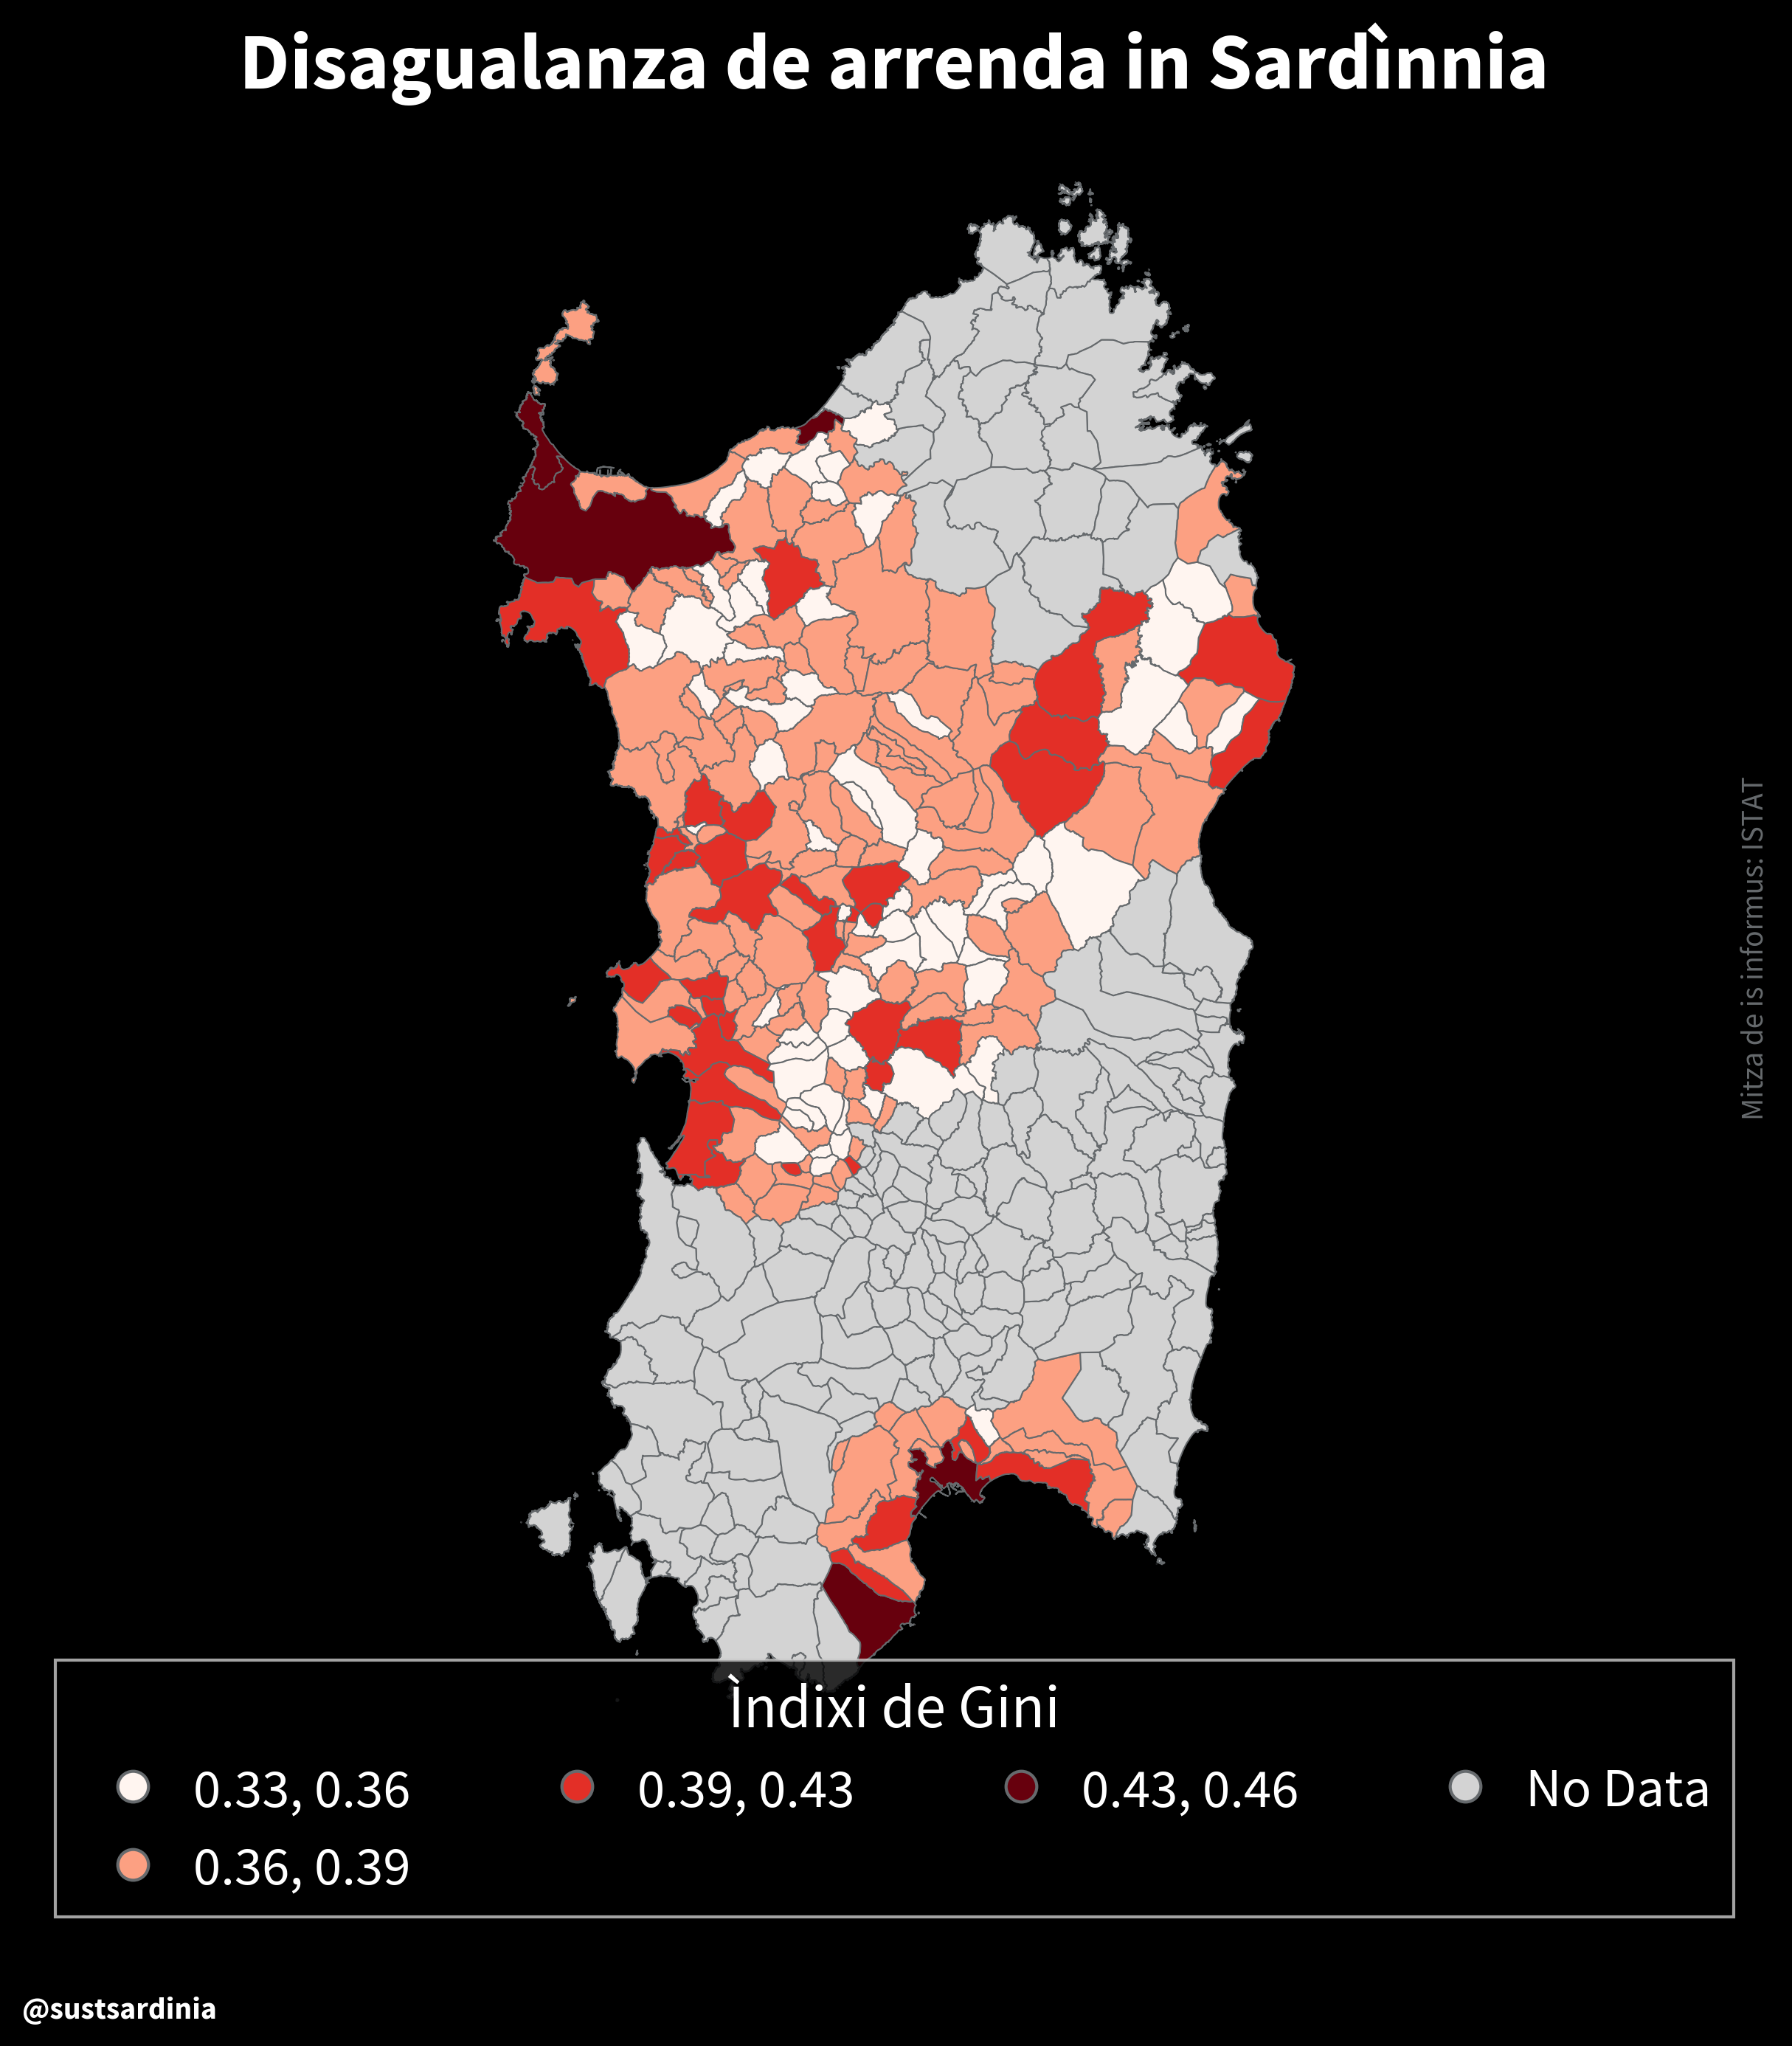

In [51]:
_plot_whole_map(gini_map, "Disagualanza de arrenda in Sardìnnia", "Ìndixi de Gini", "Mitza de is informus: ISTAT")